
🔹 Model Performance (Car Price Prediction):
Linear Regression → R²: 0.6085, RMSE: 2639.50
Ridge Regression → R²: 0.6211, RMSE: 2596.47
Lasso Regression → R²: 0.6086, RMSE: 2639.09


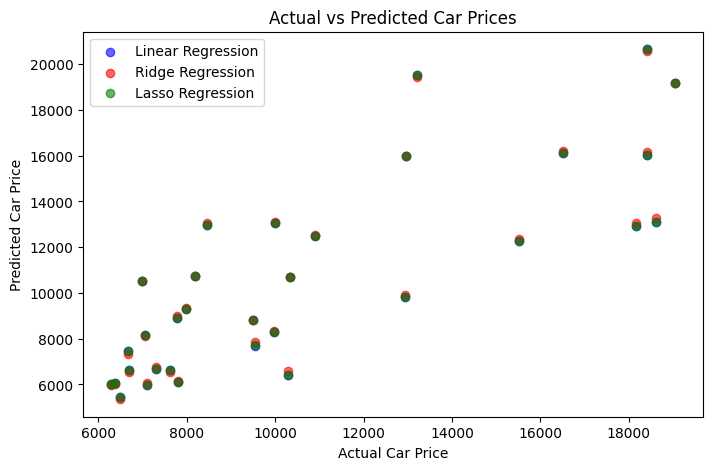

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
columns = [
    "symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", 
    "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width", 
    "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", 
    "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"
]
df = pd.read_csv(url, names=columns, na_values="?")

# Drop non-numeric and missing values
df = df.dropna()
df = df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']].astype(float)

# Split data into features (X) and target (y)
X = df.drop(columns=["price"])
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train models
lin_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=0.1)

lin_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
lasso_reg.fit(X_train_scaled, y_train)

# Predictions & Evaluation
models = {"Linear": lin_reg, "Ridge": ridge_reg, "Lasso": lasso_reg}
print("\n🔹 Model Performance (Car Price Prediction):")
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name} Regression → R²: {r2:.4f}, RMSE: {rmse:.2f}")

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(8, 5))
plt.scatter(y_test, lin_reg.predict(X_test_scaled), color="blue", label="Linear Regression", alpha=0.6)
plt.scatter(y_test, ridge_reg.predict(X_test_scaled), color="red", label="Ridge Regression", alpha=0.6)
plt.scatter(y_test, lasso_reg.predict(X_test_scaled), color="green", label="Lasso Regression", alpha=0.6)
plt.xlabel("Actual Car Price")
plt.ylabel("Predicted Car Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()
